Exporlatory Data Analysis with Super Store Data
Goal: Provide exploiraty analysis and future profit predictions using Facebook Prophet

In [78]:

#Packages 
import random 
import datetime

#Analytics 
import numpy as np
import pandas as pd 

#Graphical
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


#Models
from prophet import Prophet 



In [3]:
#Load Datafile 
df = pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
#View Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.857901,3.789574,0.156203,28.656599
std,623.245124,2.225110,0.206452,234.260115
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


We'll need to create additional columns based on the information provided to get a better sense of the profits, costs, and margin, 

Cost = Sales - Profit
Gross_Margin = (Sales - Cost )/ Sales * 100 -> percentage%  #similar to contribution margin 
Break_even = Cost  / Gross_Margin%
Net_Sales = Sales - Discount
Sales per qty = Sales / Quantity  
Profit per qty = Profit / qty  
Cost per Qty = Cost / qty 

*Reminder calculations are floats with the excption of Gross-Margin which is in percentage 

In [6]:
df['Cost'] = df['Sales'] - df['Profit']
df['Gross-Margin%'] = (df['Sales'] - df['Cost']) / df['Sales']*100   
df['Break-Even'] = df['Cost'] / df['Gross-Margin%']
df['Net-Sales'] = df['Sales'] - df['Discount']
df['Sales-per-Qty'] = df['Sales'] / df['Quantity']
df['Profit-per-Qty'] = df['Profit'] / df['Quantity']
df['Cost-per-Qty'] = df['Cost'] / df['Quantity']

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,16.00,13.752900,261.9600,130.9800,20.9568,110.0232
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,30.00,17.078600,731.9400,243.9800,73.1940,170.7860
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,47.00,0.164864,14.6200,7.3100,3.4357,3.8743
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-40.00,-33.515212,957.1275,191.5155,-76.6062,268.1217
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,11.25,1.764587,22.1680,11.1840,1.2582,9.9258


In [8]:
df[['Sales','Quantity','Discount','Profit', 'Cost', 'Gross-Margin%', 'Break-Even', 'Net-Sales', 'Sales-per-Qty', 'Profit-per-Qty','Cost-per-Qty']].describe()

,Sales,Quantity,Discount,Profit,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.857901,3.789574,0.156203,28.656599,201.201302,12.030951,inf,229.701698,60.919469,7.799175,53.120294
std,623.245124,2.225110,0.206452,234.260115,550.839360,46.675214,NaN,623.250978,142.927423,56.074952,122.251351
min,0.444000,1.000000,0.000000,-6599.978000,0.554400,-275.000000,-3246.350400,-0.356000,0.336000,-1319.995600,0.544500
25%,17.280000,2.000000,0.000000,1.728750,12.688200,7.500000,0.135334,17.140000,5.470000,0.722800,3.473600
50%,54.490000,3.000000,0.200000,8.666500,41.664000,27.000000,0.673518,54.324000,16.270000,2.767000,12.933600
75%,209.940000,5.000000,0.200000,29.364000,182.226300,36.250000,4.846739,209.862000,63.940000,8.703200,54.522000
max,22638.480000,14.000000,0.800000,8399.976000,24449.558400,50.000000,inf,22637.980000,3773.080000,1679.995200,4074.926400


As a note to the above statistic summary the break even column has "NaN" & inf as a value due to the Cost being divided by a percentage. In reality there are arent any "Nan" or "inf" values in the column


From the Prespective of a Business Manager, the below are a few questions worth asking based on the dataset 
- Preferred shipping method, for opportunity for cost savings with a Logistics Carrier -> to complete
- Which Segment of Customers bring in most profit 
- Which regions are the most profitable and least profitable to know how best to improve Profits through ads or cut back to maintain a profit -> to complete
- Profit & Loss by Item Category and or Sub-category 
- Are Discounts profitable ? 

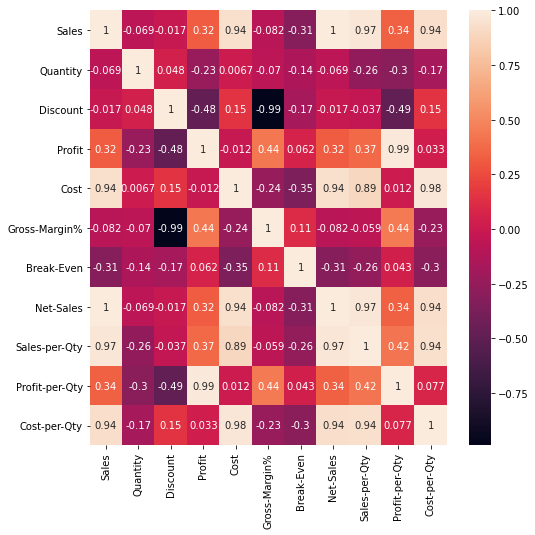

In [14]:
#Are Discounts worth the cost? we'll use a correlation matric to determine this 
df_Corr = df[['Sales','Quantity','Discount','Profit', 'Cost', 'Gross-Margin%', 'Break-Even', 'Net-Sales', 'Sales-per-Qty', 'Profit-per-Qty','Cost-per-Qty']].corr()
corrMatrix = df_Corr.corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Based on the Correlation Matrix above we can see that there is a negative relationship between discount and profits suggesting that discounts hurt profits

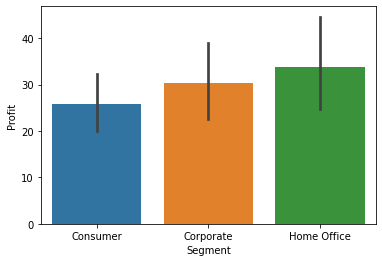

In [19]:
#Preferred shipping method 
ax = sns.barplot(x="Segment", y="Profit", data=df)

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

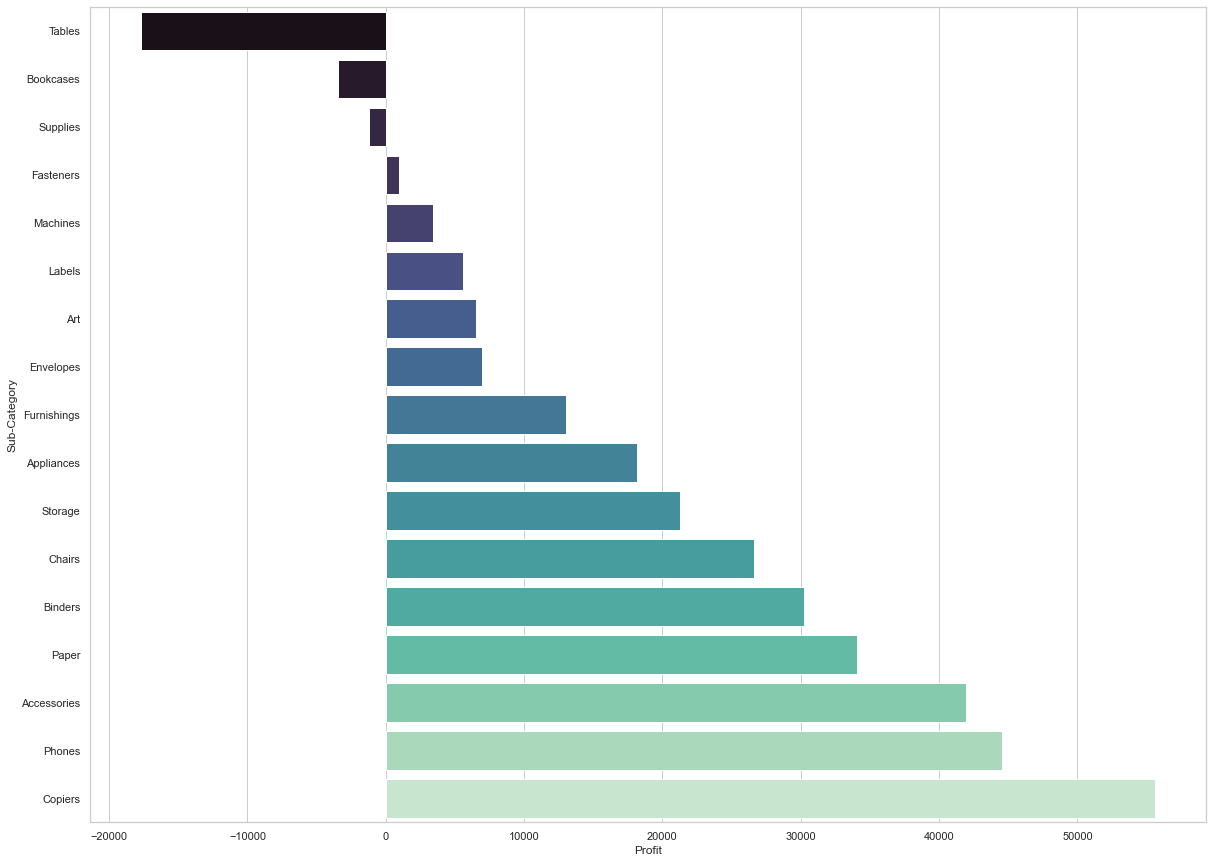

In [20]:
#Profit by item category 
sns.set(style="whitegrid")
p_source = df.groupby('Sub-Category').agg('sum')
p_source_sum = p_source.Profit.sort_values()
p_source_data = pd.DataFrame(p_source_sum).reset_index()
plt.figure(1, figsize=(20,15))
sns.barplot(x='Profit',y='Sub-Category', data=p_source_data, palette='mako')

From the above vertival Bar chart we can see that Copiers bring in the most Profit while items like Bookcase, Tables, and Supplies bring in the least amount of profit

The below graph that displays Net-Sales by Category displays similair data there are more sales, Profits with the Tech items

In [35]:
#Additionaly by category 
fig_h = px.area(df["Net-Sales"], facet_col=df["Category"])
fig_h.show()

Part 2 Time Series Predictions using Prophet
Steps
- Create random dates from a range span of 2 years -> concate it with the original DateFrame(df)
- Utilize Facebook Prophet to predict future Profits.

In [40]:
#Create a 
yyyy = [random.randint(2018,2019) for i in range(9994)]
mm = [random.randint(1,12) for i in range(9994)]
dd = [random.randint(1,28) for i in range(9994)]
print(yyyy[5], mm[5], dd[5])


2018 3 13


In [42]:
df_dates = pd.DataFrame({'year':yyyy, 'month': mm, 'day': dd})
df_dates = pd.to_datetime(df_dates)
df_dates.head()

0   2019-07-15
1   2019-12-08
2   2018-04-01
3   2019-11-02
4   2019-04-17
dtype: datetime64[ns]

In [43]:
Data = pd.concat([df, df_dates], axis=1, join='inner')
Data.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,...,Discount,Profit,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty,0
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,...,0.0,41.9136,220.0464,16.0,13.7529,261.96,130.98,20.9568,110.0232,2019-07-15
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,...,0.0,219.5820,512.3580,30.0,17.0786,731.94,243.98,73.1940,170.7860,2019-12-08


In [52]:
#Change new column name to Date
Data = Data.rename(columns={0: 'Date'})
Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,...,Discount,Profit,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty,Date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,...,0.00,41.9136,220.0464,16.00,13.752900,261.9600,130.9800,20.9568,110.0232,2019-07-15
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,...,0.00,219.5820,512.3580,30.00,17.078600,731.9400,243.9800,73.1940,170.7860,2019-12-08
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,...,0.00,6.8714,7.7486,47.00,0.164864,14.6200,7.3100,3.4357,3.8743,2018-04-01
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,...,0.45,-383.0310,1340.6085,-40.00,-33.515212,957.1275,191.5155,-76.6062,268.1217,2019-11-02
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,...,0.20,2.5164,19.8516,11.25,1.764587,22.1680,11.1840,1.2582,9.9258,2019-04-17


In [63]:
Pred_Data= Data.copy()

In [66]:
Pred_Data.drop( ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 
                 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
                 'Cost', 'Gross-Margin%', 'Break-Even', 'Net-Sales', 'Sales-per-Qty', 
                 'Profit-per-Qty', 'Cost-per-Qty'], axis=1, inplace=True)
Pred_Data.columns = ['y', 'ds']

In [67]:
Pred_Data.head()

,y,ds
0,41.9136,2019-07-15
1,219.5820,2019-12-08
2,6.8714,2018-04-01
3,-383.0310,2019-11-02
4,2.5164,2019-04-17


In [69]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(Pred_Data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [73]:
future = m.make_future_dataframe(periods=180, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,-126.121612,-418.078349,501.719504,-126.121612,-126.121612,163.254326,163.254326,163.254326,161.048435,161.048435,161.048435,2.205890,2.205890,2.205890,0.0,0.0,0.0,37.132714
1,2018-01-02,-126.242381,-459.441823,491.985165,-126.242381,-126.242381,161.501214,161.501214,161.501214,161.048435,161.048435,161.048435,0.452779,0.452779,0.452779,0.0,0.0,0.0,35.258833
2,2018-01-03,-126.363150,-438.690099,490.813926,-126.363150,-126.363150,158.722360,158.722360,158.722360,161.048435,161.048435,161.048435,-2.326075,-2.326075,-2.326075,0.0,0.0,0.0,32.359209
3,2018-01-04,-126.483920,-379.462397,482.796489,-126.483920,-126.483920,161.826922,161.826922,161.826922,161.048435,161.048435,161.048435,0.778487,0.778487,0.778487,0.0,0.0,0.0,35.343002
4,2018-01-05,-126.604689,-435.711295,474.762543,-126.604689,-126.604689,165.829092,165.829092,165.829092,161.048435,161.048435,161.048435,4.780657,4.780657,4.780657,0.0,0.0,0.0,39.224403


In [74]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
847,2020-06-21,-141.259672,-455.564713,467.288261,-149.488278,-132.055331,159.587404,159.587404,159.587404,161.048435,161.048435,161.048435,-1.461032,-1.461032,-1.461032,0.0,0.0,0.0,18.327732
848,2020-06-22,-141.313870,-423.629861,478.167567,-149.596180,-132.022342,163.254326,163.254326,163.254326,161.048435,161.048435,161.048435,2.205890,2.205890,2.205890,0.0,0.0,0.0,21.940455
849,2020-06-23,-141.368069,-426.865460,460.136526,-149.704082,-131.989808,161.501214,161.501214,161.501214,161.048435,161.048435,161.048435,0.452779,0.452779,0.452779,0.0,0.0,0.0,20.133145
850,2020-06-24,-141.422267,-454.017634,454.255491,-149.811984,-131.962704,158.722360,158.722360,158.722360,161.048435,161.048435,161.048435,-2.326075,-2.326075,-2.326075,0.0,0.0,0.0,17.300092
851,2020-06-25,-141.476466,-452.852174,457.342949,-149.919886,-131.936122,161.826922,161.826922,161.826922,161.048435,161.048435,161.048435,0.778487,0.778487,0.778487,0.0,0.0,0.0,20.350456


In [75]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,37.132714
1,2018-01-02,35.258833
2,2018-01-03,32.359209
3,2018-01-04,35.343002
4,2018-01-05,39.224403
...,...,...
847,2020-06-21,18.327732
848,2020-06-22,21.940455
849,2020-06-23,20.133145
850,2020-06-24,17.300092


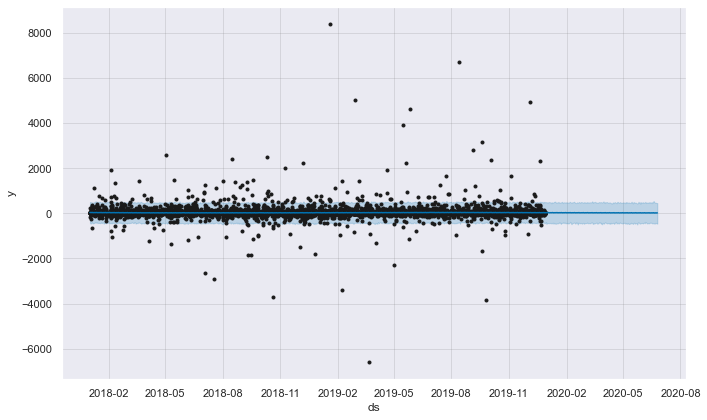

In [76]:
plot1 = m.plot(forecast)

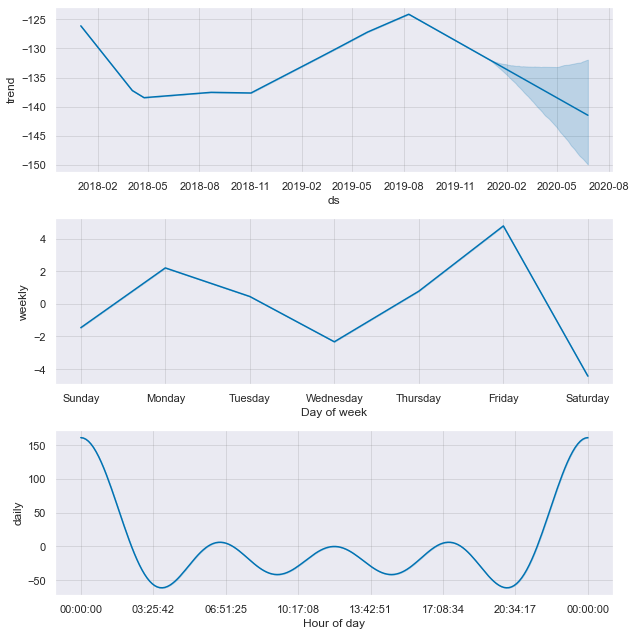

In [77]:
plot2 = m.plot_components(forecast)